In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv("data/answers_clean_complete.csv")
df_all = df_all.drop('Unnamed: 0', axis=1)
df_all = df_all.iloc[2:].reset_index(drop=True)


In [3]:
df = df_all[['role', 'gha_or_apps', 'gha_type', 'which_app', 'CI_workflows',
             'CI_configuration', 'CI_when_how_check', 'CI_situation']]

In [4]:
count_all = df.shape[0]
contributors = df['role'] == 'Source code contributor'
maintainers = df['role'] != 'Source code contributor'
count_contributors = df[contributors].shape[0]
count_maintainers = df[maintainers].shape[0]

In [5]:
df['gha_or_apps'].value_counts()

Yes, only GitHub Actions.    266
Yes, both.                    81
No.                           74
I don't know.                 40
Yes, only GitHub Apps.         9
Name: gha_or_apps, dtype: int64

In [6]:
print(df[contributors]['gha_or_apps'].isna().sum())
print(count_contributors - df[contributors]['gha_or_apps'].isna().sum())
print(df[contributors].gha_or_apps.value_counts())
print('-----')
print(df[maintainers]['gha_or_apps'].isna().sum())
print(count_maintainers - df[maintainers]['gha_or_apps'].isna().sum())
print(df[maintainers].gha_or_apps.value_counts())

0
187
Yes, only GitHub Actions.    98
I don't know.                33
No.                          29
Yes, both.                   22
Yes, only GitHub Apps.        5
Name: gha_or_apps, dtype: int64
-----
1
283
Yes, only GitHub Actions.    168
Yes, both.                    59
No.                           45
I don't know.                  7
Yes, only GitHub Apps.         4
Name: gha_or_apps, dtype: int64


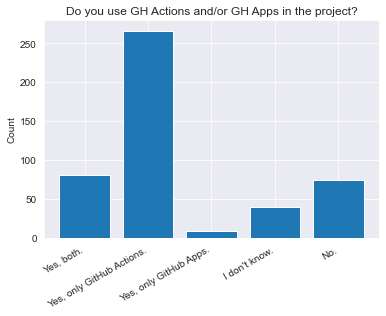

Number of not-answered: 1
Number of answered: 470


In [7]:
gha_or_apps_count = ['Yes, both.', 'Yes, only GitHub Actions.', "Yes, only GitHub Apps.", "I don't know.", "No."]
counts = [df.gha_or_apps.value_counts()['Yes, both.'], df.gha_or_apps.value_counts()['Yes, only GitHub Actions.'], df.gha_or_apps.value_counts()['Yes, only GitHub Apps.'], df.gha_or_apps.value_counts()["I don't know."], df.gha_or_apps.value_counts()["No."]]
fig, ax = plt.subplots()
ax.bar(gha_or_apps_count, counts)
ax.set_ylabel('Count')
ax.set_title('Do you use GH Actions and/or GH Apps in the project?')
plt.xticks(rotation=30, ha='right')
plt.show()

print("Number of not-answered:", df.gha_or_apps.isna().sum())
print("Number of answered:", df.shape[0] - df.gha_or_apps.isna().sum())

In [8]:
print(df.gha_or_apps.value_counts()['Yes, both.'] * 100 / 470)
print(df.gha_or_apps.value_counts()['Yes, only GitHub Actions.'] * 100 / 470)
print(df.gha_or_apps.value_counts()['Yes, only GitHub Apps.'] * 100 / 470)
print(df.gha_or_apps.value_counts()["I don't know."] * 100 / 470)
print(df.gha_or_apps.value_counts()["No."] * 100 / 470)

17.23404255319149
56.59574468085106
1.9148936170212767
8.51063829787234
15.74468085106383


In [9]:
print('Yes, both.')
print(df[contributors].gha_or_apps.value_counts()['Yes, both.'] * 100 / count_contributors)
print(df[maintainers].gha_or_apps.value_counts()['Yes, both.'] * 100 / count_maintainers)

print('Yes, only GitHub Actions.')
print(df[contributors].gha_or_apps.value_counts()['Yes, only GitHub Actions.'] * 100 / count_contributors)
print(df[maintainers].gha_or_apps.value_counts()['Yes, only GitHub Actions.'] * 100 / count_maintainers)

print('Yes, only GitHub Apps.')
print(df[contributors].gha_or_apps.value_counts()['Yes, only GitHub Apps.'] * 100 / count_contributors)
print(df[maintainers].gha_or_apps.value_counts()['Yes, only GitHub Apps.'] * 100 / count_maintainers)

print("I don't know.")
print(df[contributors].gha_or_apps.value_counts()["I don't know."] * 100 / count_contributors)
print(df[maintainers].gha_or_apps.value_counts()["I don't know."] * 100 / count_maintainers)

print('No.')
print(df[contributors].gha_or_apps.value_counts()["No."] * 100 / count_contributors)
print(df[maintainers].gha_or_apps.value_counts()["No."] * 100 / count_maintainers)

Yes, both.
11.764705882352942
20.774647887323944
Yes, only GitHub Actions.
52.406417112299465
59.15492957746479
Yes, only GitHub Apps.
2.6737967914438503
1.408450704225352
I don't know.
17.647058823529413
2.464788732394366
No.
15.508021390374331
15.845070422535212


In [10]:
df[~df['gha_type'].isna()][['gha_type']].to_csv("manual_data_inspection/gha_type.csv")

In [11]:
print(df[contributors]['gha_type'].isna().sum())
print(count_contributors - df[contributors]['gha_type'].isna().sum())
# print(df[contributors].gha_or_apps.value_counts())
print('-----')
print(df[maintainers]['gha_type'].isna().sum())
print(count_maintainers - df[maintainers]['gha_type'].isna().sum())
# print(df[maintainers].gha_or_apps.value_counts())

98
89
-----
97
187


In [12]:
print(count_all - df['gha_type'].isna().sum())
print((count_all - df['gha_type'].isna().sum()) * 100 / (df.gha_or_apps.value_counts()['Yes, both.'] + df.gha_or_apps.value_counts()['Yes, only GitHub Actions.']) )

276
79.53890489913545


In [13]:
data = pd.read_excel('manual_data_inspection/gha_type_coding.xlsx')
invalid_indexes = data[data['invalid'] == 1]['Column1'].astype(int).tolist()
# zero_indexes = data[data['zero'] == 1]['Column1'].astype(int).tolist()
donno_indexes = data[data["not sure"] == 1]['Column1'].astype(int).tolist()
print(df[df.index.isin(invalid_indexes) & (contributors)].shape[0])
print(df[df.index.isin(invalid_indexes) & (maintainers)].shape[0])
print('---')
# print(df[df.index.isin(zero_indexes) & (contributors)].shape[0])
# print(df[df.index.isin(zero_indexes) & (maintainers)].shape[0])
print('---')
print(df[df.index.isin(donno_indexes) & (contributors)].shape[0])
print(df[df.index.isin(donno_indexes) & (maintainers)].shape[0])

8
16
---
---
3
4


In [14]:
df[~df['which_app'].isna()][['which_app']].to_csv("manual_data_inspection/which_app.csv")

In [15]:
print(df[contributors]['which_app'].isna().sum())
print(count_contributors - df[contributors]['which_app'].isna().sum())
# print(df[contributors].gha_or_apps.value_counts())
print('-----')
print(df[maintainers]['which_app'].isna().sum())
print(count_maintainers - df[maintainers]['which_app'].isna().sum())
# print(df[maintainers].gha_or_apps.value_counts())

173
14
-----
231
53


In [16]:
print(count_all - df['which_app'].isna().sum())
print((count_all - df['which_app'].isna().sum()) * 100 / 471)

67
14.225053078556263


In [17]:
df_which_app = pd.read_excel("manual_data_inspection/which_app_inspected.xlsx")
print(df_which_app.shape[0])
print(df_which_app.columns)

68
Index(['Column1', 'which_app', 'invalid', 'notes', 'clean'], dtype='object')


In [18]:
def update_dict_with_list_items(my_dict, my_list):
    for item in my_list:
        if item in my_dict:
            my_dict[item] += 1
        else:
            my_dict[item] = 1
    return my_dict

codes = {}
for i,x in df_which_app.iterrows():
    codes = update_dict_with_list_items(codes, [s.strip().lower() for s in str(x['clean']).split(',')])

print(codes)

{'codecov': 19, 'renovate': 9, 'codeql': 5, 'clickhouse ci': 1, 'sonarcloud': 3, 'vercel': 3, 'appveyor': 3, 'travis ci': 4, 'nan': 11, 'azure pipelines': 3, 'cirrus ci': 1, 'lgtm': 1, 'dco': 3, 'lgtm.com': 1, 'slack': 4, 'azure devops': 1, 'circleci': 2, 'code climate': 1, 'imagebot': 1, 'cloudflare pages': 1, 'drone': 1, 'stalebot': 2, 'bors': 1, 'netlify': 2, 'changeeset': 1, 'meeseeksdev': 1, 'octobox': 1, 'pre-commit ci': 1, 'sonatype lift': 1, 'jira': 1, 'deepsource': 1, 'dependabot': 3, 'gitforwindowshelper': 1, 'custom': 1, 'codacy': 1, 'gitguardian': 1, 'vscodebot': 1, 'coveralls': 1, 'fossa': 1, 'runkit notebook': 1, 'stale': 2, 'changeset-bot': 1, 'moda-bot': 1, 'pullrequest': 1, 'sentry': 1, 'gitstream': 1, 'secureframe': 1, 'codescene': 1}


In [19]:
sorted_codes = dict(sorted(codes.items(), key=lambda x: x[1]))
print(sorted_codes)

{'clickhouse ci': 1, 'cirrus ci': 1, 'lgtm': 1, 'lgtm.com': 1, 'azure devops': 1, 'code climate': 1, 'imagebot': 1, 'cloudflare pages': 1, 'drone': 1, 'bors': 1, 'changeeset': 1, 'meeseeksdev': 1, 'octobox': 1, 'pre-commit ci': 1, 'sonatype lift': 1, 'jira': 1, 'deepsource': 1, 'gitforwindowshelper': 1, 'custom': 1, 'codacy': 1, 'gitguardian': 1, 'vscodebot': 1, 'coveralls': 1, 'fossa': 1, 'runkit notebook': 1, 'changeset-bot': 1, 'moda-bot': 1, 'pullrequest': 1, 'sentry': 1, 'gitstream': 1, 'secureframe': 1, 'codescene': 1, 'circleci': 2, 'stalebot': 2, 'netlify': 2, 'stale': 2, 'sonarcloud': 3, 'vercel': 3, 'appveyor': 3, 'azure pipelines': 3, 'dco': 3, 'dependabot': 3, 'travis ci': 4, 'slack': 4, 'codeql': 5, 'renovate': 9, 'nan': 11, 'codecov': 19}


In [20]:
df['CI_workflows'].value_counts()

Yes.                                                 370
No we don't configure our CI workflows on GitHub.     43
I don't know.                                         32
We don't have CI workflows.                           24
Name: CI_workflows, dtype: int64

In [21]:
print(df[contributors]['CI_workflows'].isna().sum())
print(count_contributors - df[contributors]['CI_workflows'].isna().sum())
print(df[contributors].CI_workflows.value_counts())
print('-----')
print(df[maintainers]['CI_workflows'].isna().sum())
print(count_maintainers - df[maintainers]['CI_workflows'].isna().sum())
print(df[maintainers].CI_workflows.value_counts())

0
187
Yes.                                                 140
I don't know.                                         21
No we don't configure our CI workflows on GitHub.     19
We don't have CI workflows.                            7
Name: CI_workflows, dtype: int64
-----
2
282
Yes.                                                 230
No we don't configure our CI workflows on GitHub.     24
We don't have CI workflows.                           17
I don't know.                                         11
Name: CI_workflows, dtype: int64


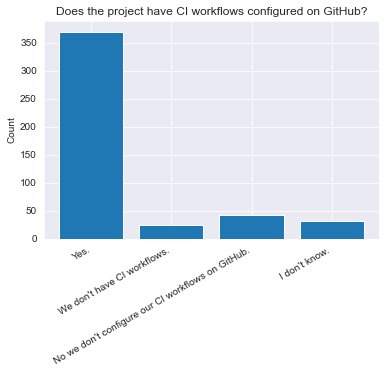

Number of not-answered: 2
Number of answered: 469


In [22]:
ci_workflows_count = ['Yes.', "We don't have CI workflows.", "No we don't configure our CI workflows on GitHub.", "I don't know."]
counts = [df.CI_workflows.value_counts()['Yes.'], df.CI_workflows.value_counts()["We don't have CI workflows."], df.CI_workflows.value_counts()["No we don't configure our CI workflows on GitHub."], df.CI_workflows.value_counts()["I don't know."]]
fig, ax = plt.subplots()
ax.bar(ci_workflows_count, counts)
ax.set_ylabel('Count')
ax.set_title('Does the project have CI workflows configured on GitHub?')
plt.xticks(rotation=30, ha='right')
plt.show()

print("Number of not-answered:", df.CI_workflows.isna().sum())
print("Number of answered:", df.shape[0] - df.CI_workflows.isna().sum())

In [23]:
print(df.CI_workflows.value_counts()['Yes.'] * 100 / 469)
print(df.CI_workflows.value_counts()["We don't have CI workflows."] * 100 / 469)
print(df.CI_workflows.value_counts()["No we don't configure our CI workflows on GitHub."] * 100 / 469)
print(df.CI_workflows.value_counts()["I don't know."] * 100 / 469)

78.89125799573561
5.11727078891258
9.168443496801705
6.823027718550106


In [24]:
print('Yes.')
print(df[contributors].CI_workflows.value_counts()['Yes.'] * 100 / count_contributors)
print(df[maintainers].CI_workflows.value_counts()['Yes.'] * 100 / count_maintainers)

print("We don't have CI workflows.")
print(df[contributors].CI_workflows.value_counts()["We don't have CI workflows."] * 100 / count_contributors)
print(df[maintainers].CI_workflows.value_counts()["We don't have CI workflows."] * 100 / count_maintainers)

print("No we don't configure our CI workflows on GitHub.")
print(df[contributors].CI_workflows.value_counts()["No we don't configure our CI workflows on GitHub."] * 100 / count_contributors)
print(df[maintainers].CI_workflows.value_counts()["No we don't configure our CI workflows on GitHub."] * 100 / count_maintainers)

print("I don't know.")
print(df[contributors].CI_workflows.value_counts()["I don't know."] * 100 / count_contributors)
print(df[maintainers].CI_workflows.value_counts()["I don't know."] * 100 / count_maintainers)

Yes.
74.8663101604278
80.98591549295774
We don't have CI workflows.
3.7433155080213902
5.985915492957746
No we don't configure our CI workflows on GitHub.
10.16042780748663
8.450704225352112
I don't know.
11.229946524064172
3.8732394366197185


In [25]:
df[~df['CI_configuration'].isna()][['CI_configuration']].to_csv("manual_data_inspection/CI_configuration.csv")

In [26]:
print(df['CI_configuration'].isna().sum())
print(count_all - df['CI_configuration'].isna().sum())
print((count_all - df['CI_configuration'].isna().sum()) * 100 / count_all)

193
278
59.02335456475584


In [27]:
print(df[contributors]['CI_configuration'].isna().sum())
print(count_contributors - df[contributors]['CI_configuration'].isna().sum())
print('-----')
print(df[maintainers]['CI_configuration'].isna().sum())
print(count_maintainers - df[maintainers]['CI_configuration'].isna().sum())

97
90
-----
96
188


In [28]:
df[~df['CI_when_how_check'].isna()][['CI_when_how_check']].to_csv("manual_data_inspection/CI_when_how_check.csv")

In [29]:
print(df[contributors]['CI_when_how_check'].isna().sum())
print(count_contributors - df[contributors]['CI_when_how_check'].isna().sum())
# print(df[contributors].CI_workflows.value_counts())
print('-----')
print(df[maintainers]['CI_when_how_check'].isna().sum())
print(count_maintainers - df[maintainers]['CI_when_how_check'].isna().sum())
# print(df[maintainers].CI_workflows.value_counts())

89
98
-----
87
197


In [30]:
data = pd.read_excel('manual_data_inspection/CI_configuration_coding.xlsx')
invalid_indexes = data[(data['invalid'] == 1) | (data['vague'] == 1)]['Column1'].astype(int).tolist()
# zero_indexes = data[data['zero'] == 1]['Column1'].astype(int).tolist()
donno_indexes = data[data["don't know"] == 1]['Column1'].astype(int).tolist()
print(df[df.index.isin(invalid_indexes) & (contributors)].shape[0])
print(df[df.index.isin(invalid_indexes) & (maintainers)].shape[0])
print('---')
# print(df[df.index.isin(zero_indexes) & (contributors)].shape[0])
# print(df[df.index.isin(zero_indexes) & (maintainers)].shape[0])
print('---')
print(df[df.index.isin(donno_indexes) & (contributors)].shape[0])
print(df[df.index.isin(donno_indexes) & (maintainers)].shape[0])

6
36
---
---
11
6


In [31]:
print(count_all - df['CI_when_how_check'].isna().sum())
print((count_all - df['CI_when_how_check'].isna().sum()) * 100 / count_all)

295
62.632696390658175


In [32]:
data = pd.read_excel('manual_data_inspection/CI_when_how_check.xlsx')
invalid_indexes = data[(data['invalid'] == 1) | (data['vague'] == 1)]['Column1'].astype(int).tolist()
# zero_indexes = data[data['zero'] == 1]['Column1'].astype(int).tolist()
donno_indexes = data[data["don't know"] == 1]['Column1'].astype(int).tolist()
print(df[df.index.isin(invalid_indexes) & (contributors)].shape[0])
print(df[df.index.isin(invalid_indexes) & (maintainers)].shape[0])
print('---')
# print(df[df.index.isin(zero_indexes) & (contributors)].shape[0])
# print(df[df.index.isin(zero_indexes) & (maintainers)].shape[0])
print('---')
print(df[df.index.isin(donno_indexes) & (contributors)].shape[0])
print(df[df.index.isin(donno_indexes) & (maintainers)].shape[0])

11
12
---
---
1
1


In [33]:
print(df[contributors]['CI_when_how_check'].isna().sum())
print(count_contributors - df[contributors]['CI_when_how_check'].isna().sum())
# print(df[contributors].CI_workflows.value_counts())
print('-----')
print(df[maintainers]['CI_when_how_check'].isna().sum())
print(count_maintainers - df[maintainers]['CI_when_how_check'].isna().sum())
# print(df[maintainers].CI_workflows.value_counts())

89
98
-----
87
197


In [36]:
df[~df['CI_situation'].isna()][['CI_situation']].to_csv("manual_data_inspection/CI_situation.csv")

In [37]:
print(count_all - df['CI_situation'].isna().sum())
print((count_all - df['CI_situation'].isna().sum()) * 100 / count_all)

299
63.481953290870486


In [38]:
print(df[contributors]['CI_situation'].isna().sum())
print(count_contributors - df[contributors]['CI_situation'].isna().sum())
# print(df[contributors].CI_workflows.value_counts())
print('-----')
print(df[maintainers]['CI_situation'].isna().sum())
print(count_maintainers - df[maintainers]['CI_situation'].isna().sum())
# print(df[maintainers].CI_workflows.value_counts())

85
102
-----
87
197


In [42]:
data = pd.read_excel('manual_data_inspection/CI_situation_coding.xlsx')
invalid_indexes = data[data['invalid'] == 1]['Column1'].astype(int).tolist()
print(df[df.index.isin(invalid_indexes) & (contributors)].shape[0])
print(df[df.index.isin(invalid_indexes) & (maintainers)].shape[0])


8
22
